In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm, sklearn.ensemble, sklearn.linear_model
from sklearn.metrics import f1_score
import librosa
import librosa.display
# import ipywidgets as widgets
from IPython import display
METADATA_PATH = 'dataset/FMA/fma_metadata/'

In [3]:
# Load genres and metadata
def generate_unique_genre():
    tracks = pd.read_csv(os.path.join(METADATA_PATH, "tracks.csv"), index_col=0, header=[0, 1])
    keep_cols = [('set', 'split'), ('set', 'subset'), ('track', 'genre_top')]

    df_all = tracks[keep_cols]
    df_all = df_all[df_all[('set', 'subset')] == 'small'] # only extract FMA_small metadata
    df_all['track_id'] = df_all.index
    #print(df_all.shape)

    # Create dictionary of genres from unique genre labels
    unique_genres = df_all[('track', 'genre_top')].unique()
    dict_genres = { unique_genres[i] : i+1 for i in range(0, len(unique_genres)) } # i+1 because feels weird to have 0 as label
    return dict_genres

In [3]:
## Create spectogram of each of the 8 genres. TODO
def create_spectogram(track_id, genre):
    filename = main.get_audio_path(AUDIO_PATH, track_id)
    y, sr = librosa.load(filename)
    print(len(y),sr)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)
#     spect = np.log(spect)
    print(spect.shape, genre)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(str(genre))
    plt.show()

In [4]:
print("CPSC554X - MGC Demo - 27th Nov 2019")
print("*----------------------------------*")
track_id = input("Enter file name: ")
file_name = (track_id+".mp3")
data, sample_rate = librosa.load(file_name)
print("*----------------------------------*")
print("File loaded: "+file_name)
print('Audio Sampling Rate: '+str(sample_rate)+' samples/sec')
print('Total Samples: '+str(np.size(data)))
secs=np.size(data)/sample_rate
print('Audio Length: '+str(secs)+' s')
print("*----------------------------------*")
print("Types of genre:")
genres = generate_unique_genre()
print(genres)
print("*----------------------------------*")

CPSC554X - MGC Demo - 27th Nov 2019
*----------------------------------*
Enter file name: song2
*----------------------------------*
File loaded: song2.mp3
Audio Sampling Rate: 22050 samples/sec
Total Samples: 3199544
Audio Length: 145.10403628117913 s
*----------------------------------*
Types of genre:
{'Hip-Hop': 1, 'Pop': 2, 'Folk': 3, 'Experimental': 4, 'Rock': 5, 'International': 6, 'Electronic': 7, 'Instrumental': 8}
*----------------------------------*


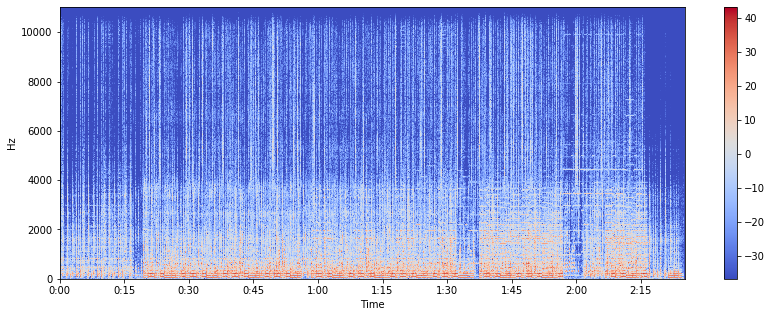

In [6]:
#Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 6250)


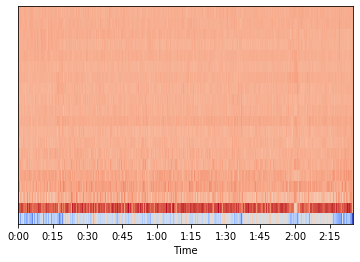

In [7]:
##MFCC
mfccs = librosa.feature.mfcc(data, sr=sample_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [ ]:
# Train model here

In [ ]:
# Run model

In [12]:
#Output
predicted_value = 7
print("Summary of predicted results")
print("Dataset used: FMA dataset small")
print("Model used: XXXXX")
print("Actual genre: Folk")
print("Predicted genre: "+list(genres.keys())[list(genres.values()).index(predicted_value)])
print("*---------------------------------*")
print("Breakdown of prediction model")
for i in genres:
    print(i +": 0.XX")

Summary of predicted results
Dataset used: FMA dataset small
Model used: XXXXX
Actual genre: Folk
Predicted genre: Electronic
*---------------------------------*
Breakdown of prediction model
Hip-Hop: 0.XX
Pop: 0.XX
Folk: 0.XX
Experimental: 0.XX
Rock: 0.XX
International: 0.XX
Electronic: 0.XX
Instrumental: 0.XX
